# _Laptop Price Prediction - Regression Project_

_Geçmiş verilerden geleceği tahmin etme_<br>
_İki veya daha fazla değişken arasındaki ilişkiyi analiz etmek için kullanılan bir yöntemdir._<br>
_Bİlgisayar fiyatlarını tahmin eden bir makine öğrenmesi modeli geliştireceğiz. Başarı oranını %85 in üzerinde tutmaya çalışacağız._


#### _İmport_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### _Exploratory Data Analysis_

In [2]:
df=pd.read_csv('laptop_data.csv')

In [3]:
df.head() # ilk 5 veri

Unnamed: 0 Company   TypeName  Inches                    ScreenResolution  \
0           0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1           1   Apple  Ultrabook    13.3                            1440x900   
2           2      HP   Notebook    15.6                   Full HD 1920x1080   
3           3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4           4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [4]:
df.tail() # son 5 veri

Unnamed: 0 Company            TypeName  Inches  \
1298        1298  Lenovo  2 in 1 Convertible    14.0   
1299        1299  Lenovo  2 in 1 Convertible    13.3   
1300        1300  Lenovo            Notebook    14.0   
1301        1301      HP            Notebook    15.6   
1302        1302    Asus            Notebook    15.6   

                                ScreenResolution  \
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu   Ram              Memory  \
1298            Intel Core i7 6500U 2.5GHz   4GB           128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB           512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB  64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB             1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB           500GB HDD   

                        Gpu       OpSys  Weight     Price  
1298  Intel HD Graphics 520  Windows 10   1.8kg  33992.64  
1299  Intel HD Graphics 520  Windows 10   1.3kg  79866.72  
1300      Intel HD Graphics  Windows 10   1.5kg  12201.12  
1301     AMD Radeon R5 M330  Windows 10  2.19kg  40705.92  
1302      Intel HD Graphics  Windows 10   2.2kg  19660.32

In [5]:
df.sample() # rastgele veri

Unnamed: 0 Company TypeName  Inches             ScreenResolution  \
643         643    Asus   Gaming    15.6  IPS Panel Full HD 1920x1080   

                             Cpu  Ram   Memory                         Gpu  \
643  Intel Core i7 7700HQ 2.8GHz  8GB  1TB HDD  Nvidia GeForce GTX 1050 Ti   

     OpSys Weight     Price  
643  No OS  2.5kg  62284.32

In [6]:
df.shape # satır ve sutun sayısı

(1303, 12)

In [7]:
df.info() # bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
df.isnull().sum() # boş veri var mı diye bakmak için;

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [10]:
df['Ram']=df['Ram'].str.replace('GB','') # ram sutununda GB yazan yerleri boşluk ile değiştir
df['Weight']=df['Weight'].str.replace('kg','') # weight sütununda kg yazan yerleri boşluk ile değiştir

In [11]:
df['Ram']=df['Ram'].astype('int32') # ram sütununun veri tipini int yap, ve ram değişkeni içerisine ata
df['Weight']=df['Weight'].astype('float32') # weight sütununun veri tipini float yap, ve weight değişkeni içerisine ata

In [12]:
df.info() # sütunların veri tipi değişti mi kontrol etmek için ram, weight

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [13]:
df['Company'].unique()

# hangi marka bilgisayarlar var

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [14]:
df['Company'].value_counts()

# hangi bilgisayardan kaç tane var

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [15]:
df['Company'].value_counts(normalize=True)

# hangi bilgisayardan kaç tane var. % olarak

Company
Dell         0.227936
Lenovo       0.227936
HP           0.210284
Asus         0.121259
Acer         0.079048
MSI          0.041443
Toshiba      0.036838
Apple        0.016117
Samsung      0.006907
Mediacom     0.005372
Razer        0.005372
Microsoft    0.004605
Vero         0.003070
Xiaomi       0.003070
Chuwi        0.002302
Fujitsu      0.002302
Google       0.002302
LG           0.002302
Huawei       0.001535
Name: proportion, dtype: float64

#### _Feature Engineering - Grafik_

_Datanın aslında olmayan fakat data kullanılarak yeni sütun oluşturma işine feature engineering denir._

In [16]:
df.sample() # her hangi bi veri satırı çağırarak nerelerde feature engineering yapmamız gerektiğine bakalım.

Company  TypeName  Inches ScreenResolution                         Cpu  \
1227    Dell  Notebook    15.6         1366x768  Intel Core i5 7200U 2.5GHz   

      Ram   Memory                    Gpu  OpSys  Weight       Price  
1227    4  1TB HDD  Intel HD Graphics 520  Linux    2.18  27804.7008

##### _ScreenResolution_

In [17]:
df['ScreenResolution'].value_counts() # ScreenResolution sütununun değerlerine bakalım.

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [18]:
df['Touchscreen'] = np.where(df['ScreenResolution'].str.contains('Touchscreen'), 1, 0)

# "ScreenResolution" sütununda 'Touchscreen' kelimesi geçen satırlar için yeni bir "Touchscreen" sütunu oluşturuyoruz.
# Eğer 'Touchscreen' geçiyorsa 1, geçmiyorsa 0 olacak.

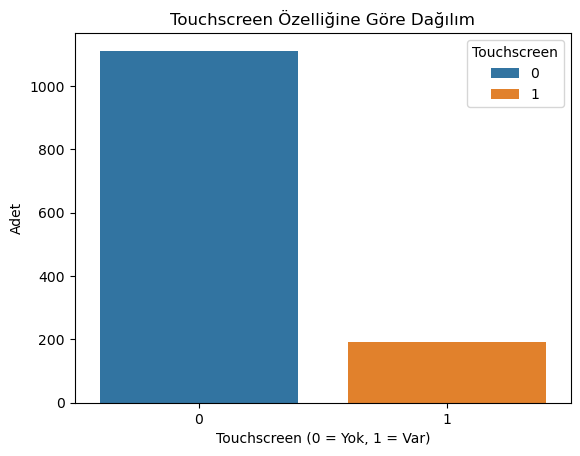

In [19]:
sns.countplot(x=df['Touchscreen'], hue=df['Touchscreen']) # hue=df['Touchscreen'] parametresi, her bir değeri (0 ve 1) farklı renklerde göstermeye yarar.
plt.title('Touchscreen Özelliğine Göre Dağılım') # Grafiğe başlık ekliyoruz
plt.xlabel('Touchscreen (0 = Yok, 1 = Var)') # x ekseninde Touchscreen sütunu olacak.
plt.ylabel('Adet') # y ekseninde adetler olacak
plt.show() # Grafiği ekranda gösteriyoruz

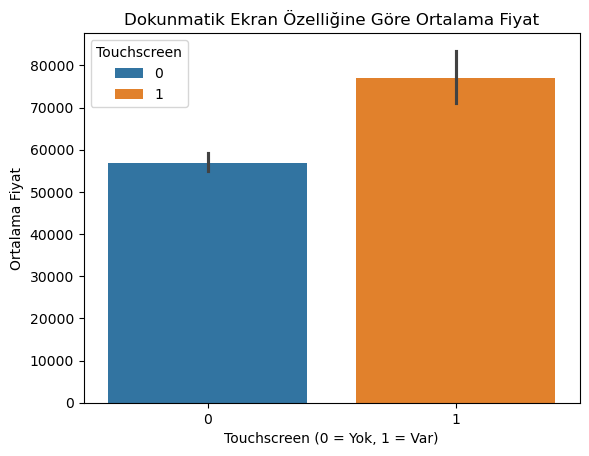

In [20]:
sns.barplot(x=df['Touchscreen'], y=df['Price'], hue=df['Touchscreen'])
plt.title('Dokunmatik Ekran Özelliğine Göre Ortalama Fiyat')
plt.xlabel('Touchscreen (0 = Yok, 1 = Var)')
plt.ylabel('Ortalama Fiyat')
plt.show()

# Dokunmatik ekranlı laptop’lar, dokunmatik olmayanlara göre ortalama olarak daha yüksek fiyatlı

In [21]:
df['Ips'] = np.where(df['ScreenResolution'].str.contains('IPS'), 1, 0)

# "ScreenResolution" sütununda 'Ips' kelimesi geçen satırlar için yeni bir "Ips" sütunu oluşturuyoruz.
# Eğer 'Ips' geçiyorsa 1, geçmiyorsa 0 olacak.

In [22]:
df.sample() # kontrol edelim

Company  TypeName  Inches ScreenResolution  \
503  Lenovo  Notebook    14.0         1366x768   

                                      Cpu  Ram     Memory  \
503  Intel Celeron Dual Core N3350 1.1GHz    4  500GB HDD   

                       Gpu       OpSys  Weight     Price  Touchscreen  Ips  
503  Intel HD Graphics 500  Windows 10     2.1  15930.72            0    0

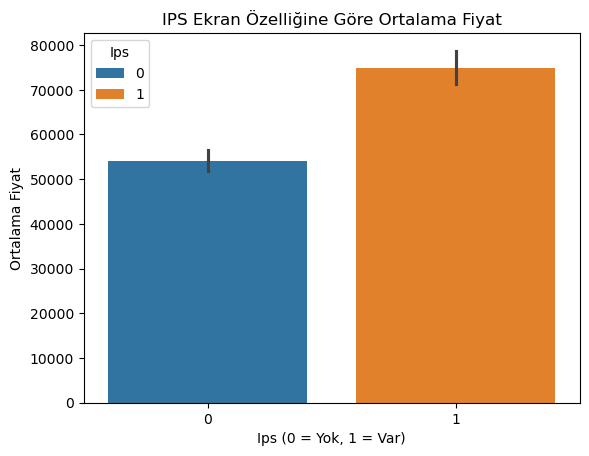

In [23]:
sns.barplot(x=df['Ips'], y=df['Price'], hue=df['Ips'])
plt.title('IPS Ekran Özelliğine Göre Ortalama Fiyat')
plt.xlabel('Ips (0 = Yok, 1 = Var)')
plt.ylabel('Ortalama Fiyat')
plt.show()

# Ips ekranlı laptop’lar, dokunmatik olmayanlara göre ortalama olarak daha yüksek fiyatlı

In [24]:
df[['x_res', 'y_res']] = df['ScreenResolution'].str.split('x', expand=True)

# x_res = yatay çözünürlük ör(1920)
# y_res = dikey çözünürlük ör(1080)
# x_res ve y_res adında iki değişken oluşturuyoruz.
# str.split('x') = ScreenResolution sütunu içerisindeki her bir metni 'x' karakterinden bölüyor
# expand=True = Sonucu bir DataFrame olarak döndürür (liste yerine)
# Mesela 1920x1080 olan çözünürlükte x nın solunda kalan kısım x_res sütununa, sağında kalan kısım y_res sütununa yazılır.

In [25]:
df.head() # kontrol edelim

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

                           x_res y_res  
0  IPS Panel Retina Display 2560  1600  
1                           1440   900  
2                   Full HD 1920  1080  
3  IPS Panel Retina Display 2880  1800  
4  IPS Panel Retina Display 2560  1600

In [26]:
df['x_res'] = df['x_res'].str.replace(',', '').str.extract(r'(\d+\.?\d+)')

# 'x_res' sütunundaki değerlerden sayısal kısımları temiz ve düzenli hale getiriyoruz. sadece sayısal çözünürlük değerini alıyoruz.
# str.replace(',', '') = Virgülleri kaldırıyoruz (örneğin '1,920' → '1920')
# str.extract(r'(\d+\.?\d+)') = sayı kısmını (tam veya ondalıklı) çıkarıyoruz

In [27]:
df.head() # kontrol

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

  x_res y_res  
0  2560  1600  
1  1440   900  
2  1920  1080  
3  2880  1800  
4  2560  1600

In [28]:
df['x_res'] = df['x_res'].astype('int')
df['y_res']=df['y_res'].astype('int')

# veri tiplerini int olarak değiştir

In [29]:
df.info() # kontrol

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  x_res             1303 non-null   int64  
 14  y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [30]:
df.corr(numeric_only=True)['Price']

# Price sütunu ile diğer tüm sayısal değişkenlerin korelasyonunu gösterir.
# numeric_only=True => sadece sayısal veri olan sütunlarda korelasyon yapmak için bu kodu ekleriz. 
# Eğer eklemezsek metin içeren sütunları okuyamayacağı için hata verir.

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

In [31]:
df['ppi'] = (((df['x_res']**2) + (df['y_res']**2))**0.5 / df['Inches']).astype('float')

# Ekran çözünürlüğü ve boyutuna göre inç başına piksel yoğunluğunu (ppi) hesaplar ve ppi sütununu oluşturur.

In [32]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
x_res          0.556529
y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [33]:
del df['ScreenResolution']

In [34]:
df.sample() 

# ScreenResolution sütununu parçalayarak yeni sütunlar oluşturduğum için sildim. Kontrol edelim;

Company TypeName  Inches                          Cpu  Ram     Memory  \
393     MSI   Gaming    17.3  Intel Core i7 7700HQ 2.8GHz    8  256GB SSD   

                            Gpu       OpSys  Weight     Price  Touchscreen  \
393  Nvidia GeForce GTX 1050 Ti  Windows 10     2.7  71874.72            0   

     Ips  x_res  y_res         ppi  
393    0   1920   1080  127.335675

In [35]:
# ppi sütunu bu bilgileri zaten temsil ettiği için Inches, x_res ve y_res sütunlarını siliyoruz;

In [36]:
del df['Inches']
del df['x_res']
del df['y_res']

##### _Cpu_

In [37]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [38]:
df['Cpu_name'] = df['Cpu'].str.split().str[:3].str.join(' ')

# Cpu sütunundaki metinden yalnızca ilk üç kelimeyi alarak yeni bir sütun (Cpu_name) oluşturur

In [39]:
df.sample() # kontrol

Company  TypeName                         Cpu  Ram     Memory  \
463  Lenovo  Notebook  Intel Core i7 7500U 2.7GHz    8  512GB SSD   

                    Gpu  OpSys  Weight     Price  Touchscreen  Ips  \
463  AMD Radeon R7 M460  No OS     1.5  42570.72            0    1   

            ppi       Cpu_name  
463  157.350512  Intel Core i7

In [40]:
# Koşullar
conditions = [
    df['Cpu_name'].isin(['Intel Core i7', 'Intel Core i5', 'Intel Core i3']),
    df['Cpu_name'].str.startswith('Intel'),
    df['Cpu_name'].str.startswith('AMD')
]

# Karşılık gelen sonuçlar
choices = [
    df['Cpu_name'],
    'Other Intel Processor',
    'AMD Processor'
]

# np.select() ile yeni sütun oluşturma
df['Cpu brand'] = np.select(conditions, choices, default='Unknown')

# İşlemci adını gruplandır: i7/i5/i3 → kendi adıyla kalır, diğer Intel → Other Intel, AMD → AMD Processor

In [41]:
df.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

          ppi       Cpu_name      Cpu brand  
0  226.983005  Intel Core i5  Intel Core i5  
1  127.677940  Intel Core i5  Intel Core i5  
2  141.211998  Intel Core i5  Intel Core i5  
3  220.534624  Intel Core i7  Intel Core i7  
4  226.983005  Intel Core i5  Intel Core i5

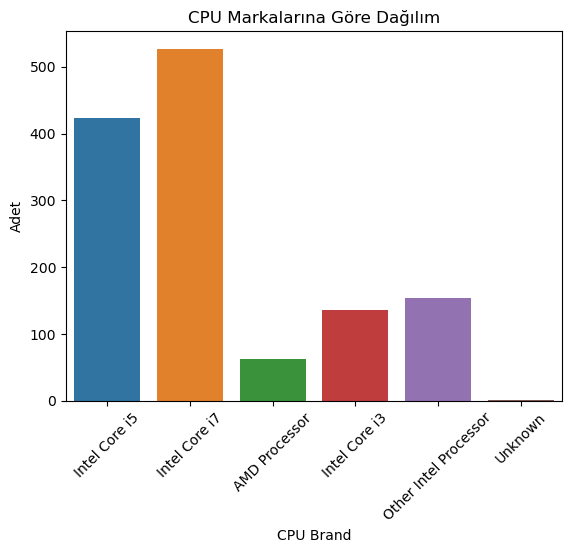

In [42]:
sns.countplot(x=df['Cpu brand'], hue=df['Cpu brand']) 
plt.title('CPU Markalarına Göre Dağılım') # Grafiğe başlık ekliyoruz
plt.xlabel('CPU Brand') 
plt.ylabel('Adet')
plt.xticks(rotation=45)
plt.show() 

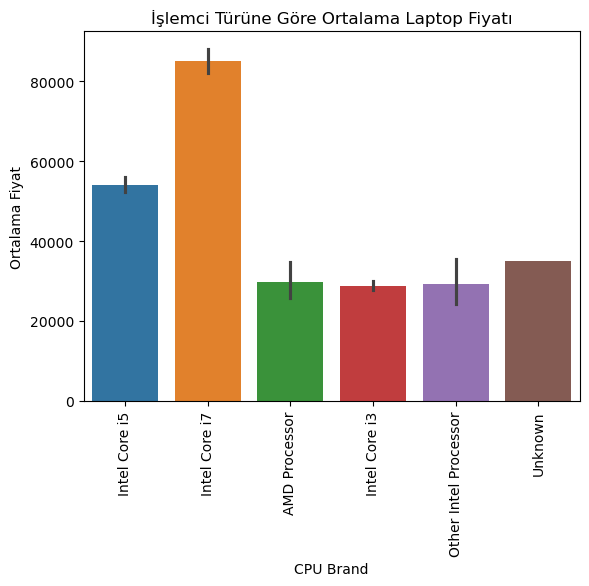

In [43]:
sns.barplot(x=df['Cpu brand'], y=df['Price'], hue=df['Cpu brand'])
plt.title('İşlemci Türüne Göre Ortalama Laptop Fiyatı')
plt.xlabel('CPU Brand')
plt.ylabel('Ortalama Fiyat')
plt.xticks(rotation='vertical')
plt.show()

In [44]:
del df['Cpu']
del df['Cpu_name']

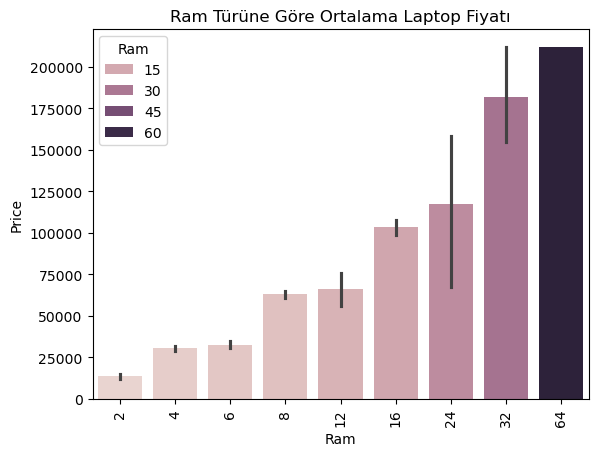

In [45]:
sns.barplot(x=df['Ram'], y=df['Price'], hue=df['Ram'])
plt.title('Ram Türüne Göre Ortalama Laptop Fiyatı')
plt.xticks(rotation='vertical')
plt.show()

##### _Memory_

In [46]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [47]:
df['Memory'] = df['Memory'].astype(str).str.replace('TB', '000').str.replace('GB', '')

# 'TB' değerlerini '000' ile değiştiriyoruz (örneğin 1TB -> 1000GB)
# 'GB' yazılarını kaldırıyoruz (örneğin 512GB -> 512)

In [48]:
df['HDD'] = df['Memory'].str.extract(r'(\d+)\s*HDD', expand=False).fillna(0).astype(int)

# HDD kapasitesini metinden sayısal olarak çıkarıyoruz
# Örnek: "512SSD + 1TB HDD" -> 1000 (çünkü 1TB = 1000GB)

In [49]:
df['SSD'] = df['Memory'].str.extract(r'(\d+)\s*SSD', expand=False).fillna(0).astype(int)

# SSD kapasitesini metinden sayısal olarak çıkarıyoruz
# Örnek: "512SSD + 1TB HDD" -> 512

In [50]:
df['Hybrid'] = df['Memory'].str.extract(r'(\d+)\s*Hybrid', expand=False).fillna(0).astype(int)

# Hybrid disk kapasitesini çıkarıyoruz (varsa)

In [51]:
df['Flash_Storage'] = df['Memory'].str.extract(r'(\d+)\s*Flash Storage', expand=False).fillna(0).astype(int)

# Flash Storage kapasitesini çıkarıyoruz (örneğin 128GB Flash Storage)

In [52]:
# str.extract() → metinden belirli desenleri (r'(\d+)\s*HDD') yakaladı
# (\d+) → sayısal değerleri bulur
# fillna(0) → o tür depolama yoksa 0 atar
# astype(int) → metinleri tam sayıya çevirir

In [53]:
df.sample() # kontrol

Company  TypeName  Ram   Memory             Gpu       OpSys  Weight  \
100      HP  Notebook    8  256 SSD  AMD Radeon 530  Windows 10    1.91   

        Price  Touchscreen  Ips         ppi      Cpu brand  HDD  SSD  Hybrid  \
100  38308.32            0    0  141.211998  Intel Core i7    0  256       0   

     Flash_Storage  
100              0

In [54]:
del df['Memory']

In [55]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.094703
SSD              0.676202
Hybrid          -0.004826
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [56]:
# %25 lik değerin altında olduğu için hybrid ve flash_stroge sütunlarınıda silelim;

In [57]:
del df['Hybrid']
del df['Flash_Storage']

##### _Gpu_

In [58]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [59]:
df['Gpu brand'] = df['Gpu'].str.split().str[0]

# Gpu sütunundaki değerleri boşluklardan bölüp, ilk kelimeyi (marka ismini) alıyoruz

In [60]:
df['Gpu brand'].loc[df['Gpu brand'] != 'ARM'].value_counts()

# 'ARM' markalı GPU'ları veri setinden çıkarıp kalan GPU markalarının sayısını listeliyoruz

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [61]:
del df['Gpu']

##### _OpSys_

In [62]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

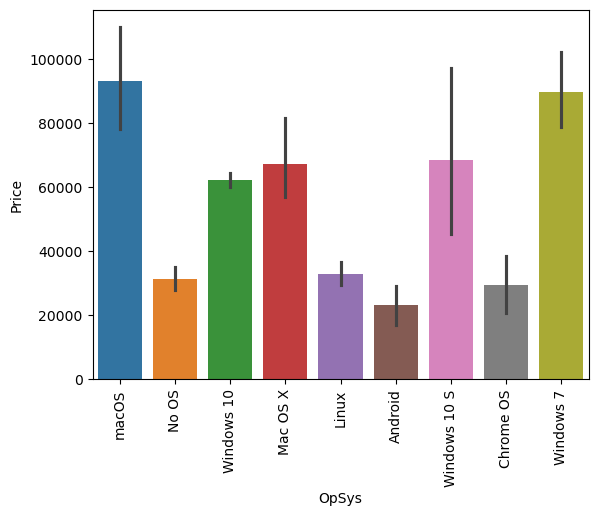

In [63]:
sns.barplot(x=df['OpSys'],y=df['Price'], hue=df['OpSys'])
plt.xticks(rotation='vertical')
plt.show()

In [64]:
# İşletim sistemlerini belirli koşullara göre sınıflandırıyoruz
conditions = [
    df['OpSys'].isin(['Windows 10', 'Windows 7', 'Windows 10 S']),
    df['OpSys'].isin(['macOS', 'Mac OS X'])
]
choices = ['Windows', 'Mac']

# Koşullara göre seçim yap, eşleşmeyenleri 'Others/No OS/Linux' olarak ata
df['os'] = np.select(conditions, choices, default='Others/No OS/Linux')

In [65]:
del df['OpSys']

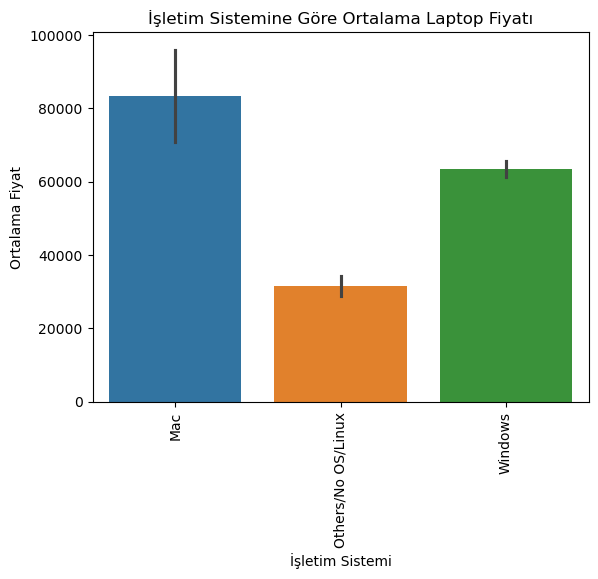

In [66]:
sns.barplot(x=df['os'], y=df['Price'], hue=df['os'])
plt.title('İşletim Sistemine Göre Ortalama Laptop Fiyatı')
plt.xlabel('İşletim Sistemi')
plt.ylabel('Ortalama Fiyat')
plt.xticks(rotation='vertical')
plt.show()

##### _Grafikler_

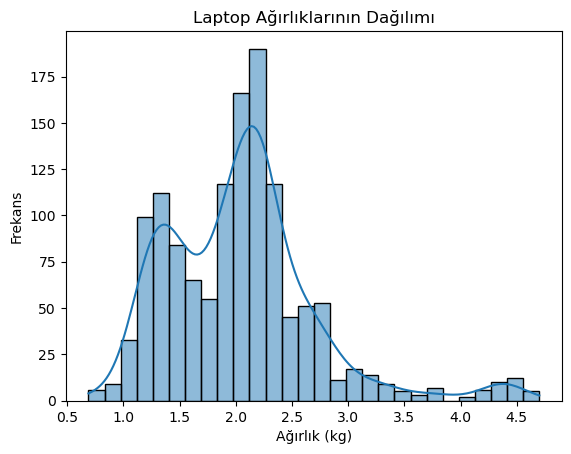

In [67]:
sns.histplot(df['Weight'], kde=True)
plt.title('Laptop Ağırlıklarının Dağılımı')
plt.xlabel('Ağırlık (kg)')
plt.ylabel('Frekans')
plt.show()

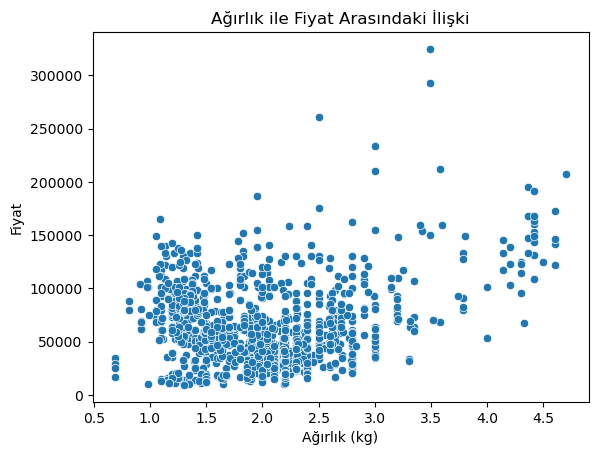

In [68]:
sns.scatterplot(x=df['Weight'], y=df['Price'])
plt.title('Ağırlık ile Fiyat Arasındaki İlişki')
plt.xlabel('Ağırlık (kg)')
plt.ylabel('Fiyat')
plt.show()

In [69]:
df.corr(numeric_only=True)['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
ppi            0.473487
HDD           -0.094703
SSD            0.676202
Name: Price, dtype: float64

<Axes: >

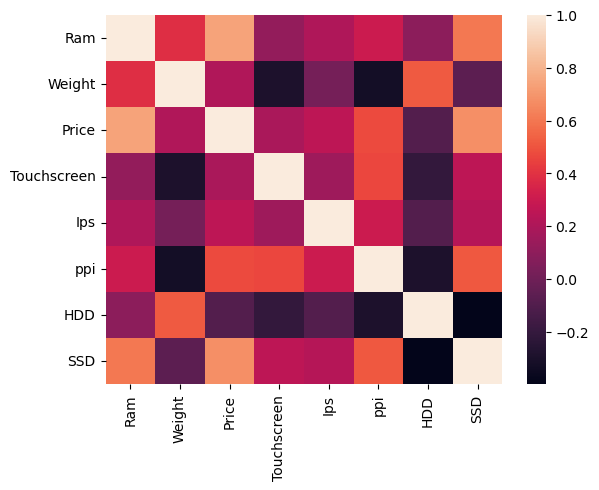

In [70]:
sns.heatmap(df.corr(numeric_only=True))

#### _P - Value Hesaplama_

In [71]:
from scipy.stats import ttest_ind

In [72]:
t,p=ttest_ind(df['Price'],df['Touchscreen']) 

In [73]:
p

np.float64(0.0)

In [74]:
p<0.05

np.True_

_Sonuç touchscreen özelliğinin bilgisayar fiyatları arasında bir bağ var. Tesadüf ile açıklanamaz_

In [75]:
t

np.float64(58.0274783601898)

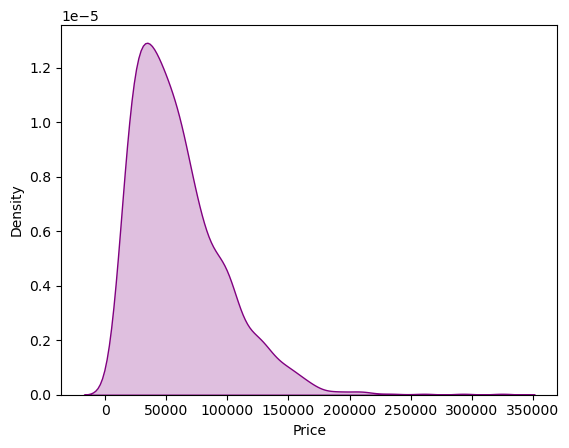

In [76]:
sns.kdeplot(x=df['Price'], fill=True, color='purple');

# color='' = garfiğin içerisini renklendirerek doldurmuş olduk.
# dağılım grafiği

#### _Box Plot Outlier - Ayrık Verileri Gösterir_

In [77]:
# outlier formulu = [ortalama +- 3* standart sapma] bu formulün dışında kalanlar outlierdır

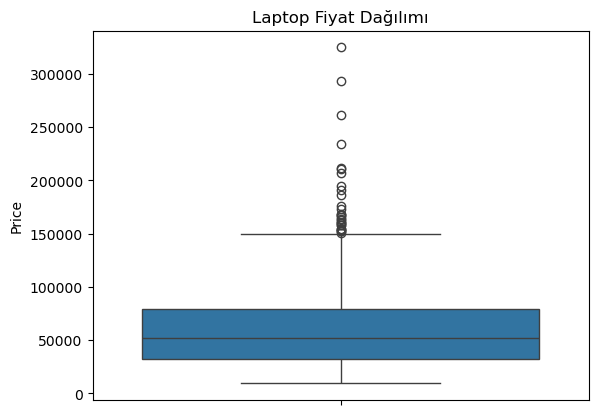

In [78]:
sns.boxplot(y=df['Price'])
plt.title("Laptop Fiyat Dağılımı")
plt.show()

In [79]:
df.sample()

Company TypeName  Ram  Weight     Price  Touchscreen  Ips         ppi  \
165     MSI   Gaming   16     2.4  95850.72            0    1  141.211998   

         Cpu brand   HDD  SSD Gpu brand       os  
165  Intel Core i7  1000  256    Nvidia  Windows

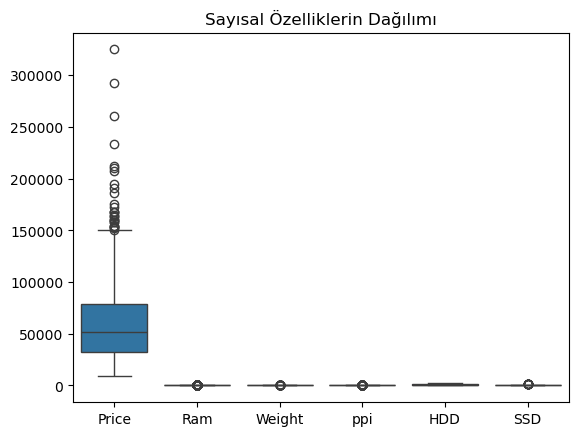

In [80]:
sns.boxplot(data=df[['Price', 'Ram', 'Weight', 'ppi', 'HDD', 'SSD']])
plt.title("Sayısal Özelliklerin Dağılımı")
plt.show()

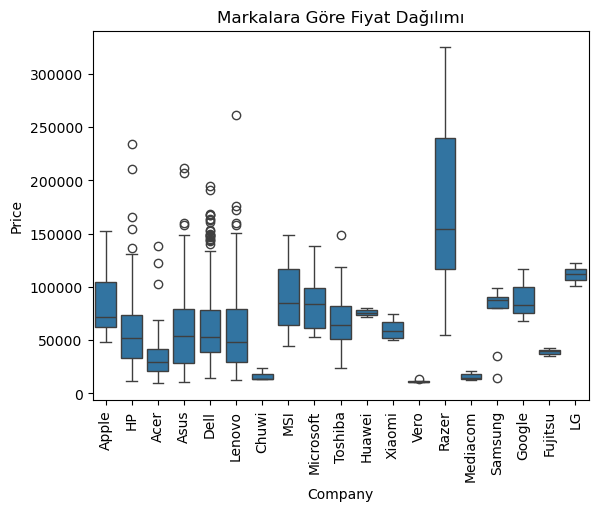

In [81]:
sns.boxplot(x='Company', y='Price', data=df)
plt.xticks(rotation=90)
plt.title("Markalara Göre Fiyat Dağılımı")
plt.show()

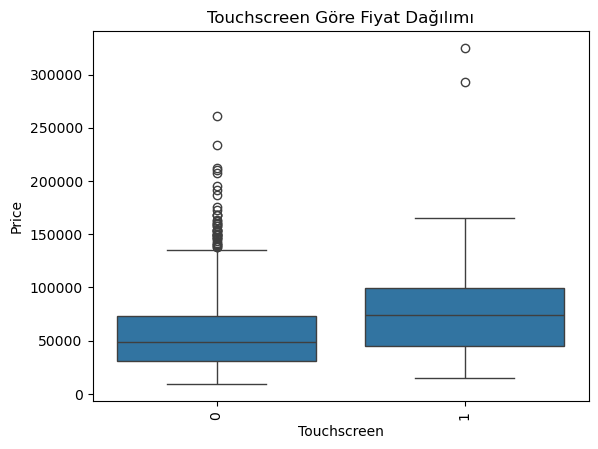

In [82]:
sns.boxplot(x='Touchscreen', y='Price', data=df)
plt.xticks(rotation=90)
plt.title("Touchscreen Göre Fiyat Dağılımı")
plt.show()

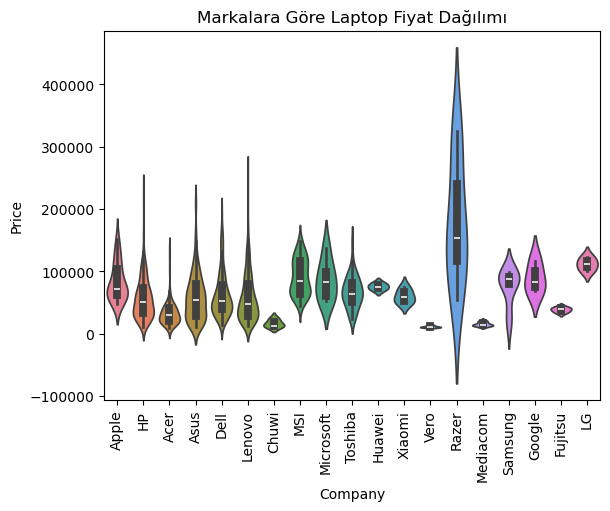

In [83]:
sns.violinplot(x='Company', y='Price', data=df, hue='Company')
plt.xticks(rotation=90)
plt.title("Markalara Göre Laptop Fiyat Dağılımı")
plt.show()

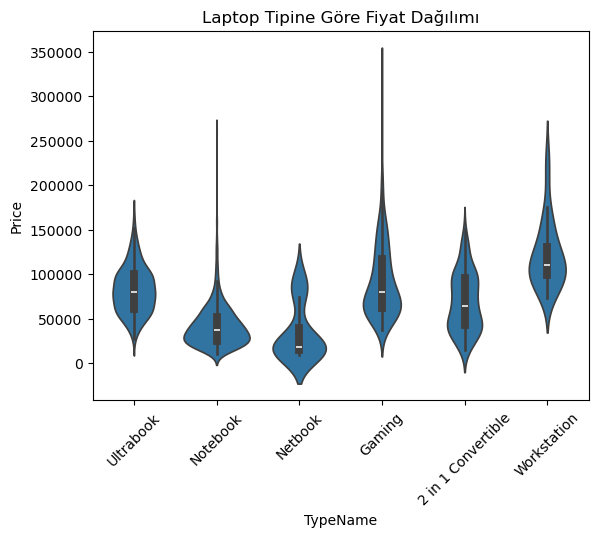

In [84]:
sns.violinplot(x='TypeName', y='Price', data=df)
plt.xticks(rotation=45)
plt.title("Laptop Tipine Göre Fiyat Dağılımı")
plt.show()

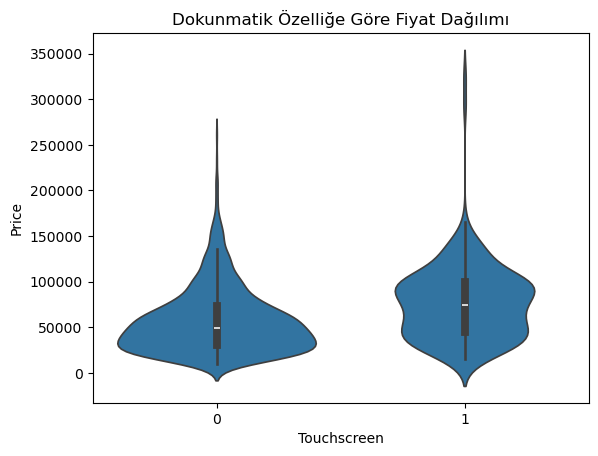

In [85]:
sns.violinplot(x='Touchscreen', y='Price', data=df)
plt.title("Dokunmatik Özelliğe Göre Fiyat Dağılımı")
plt.show()


#### _Butun Datayı Canlı Görmek İçin_

In [86]:
import plotly.express as px

In [87]:
px.bar(df, 
       x='Company', 
       y='Price', 
       color='Company', 
       title='Markalara Göre Ortalama Laptop Fiyatı')

In [88]:
px.bar(df, 
       x='TypeName', 
       y='Price', 
       color='TypeName', 
       title='Laptop Tipine Göre Ortalama Fiyat')

In [89]:
px.bar(df, 
       x='os', 
       y='Price', 
       color='os', 
       title='İşletim Sistemine Göre Ortalama Fiyat')

In [90]:
px.scatter_3d(
    df,
    x='ppi',          # ekran boyutu
    y='Ram',              # bellek miktarı
    z='Price',            # fiyat
    color='Company',      # renklendirme: marka
    title='Ekran Boyutu, RAM ve Fiyat Arasındaki İlişki'
)

In [91]:
px.sunburst(
    df,
    path=['Company', 'TypeName', 'os'],  # Hiyerarşi sırası
    values='Price',
    color='Company',
    title='Marka, Model Tipi ve İşletim Sistemine Göre Fiyat Dağılımı'
)


#### _Modelling_

In [92]:
df['TotalStorage'] = df['HDD'] + df['SSD']
df['Touch_Ips'] = df['Touchscreen'] * df['Ips']
df['PerformanceIndex'] = df['Ram'] * df['ppi']

In [93]:
df.corr(numeric_only=True)

Ram    Weight     Price  Touchscreen       Ips  \
Ram               1.000000  0.383874  0.743007     0.116984  0.206623   
Weight            0.383874  1.000000  0.210370    -0.294620  0.016967   
Price             0.743007  0.210370  1.000000     0.191226  0.252208   
Touchscreen       0.116984 -0.294620  0.191226     1.000000  0.150512   
Ips               0.206623  0.016967  0.252208     0.150512  1.000000   
ppi               0.303763 -0.323240  0.473487     0.460587  0.300879   
HDD               0.098016  0.513948 -0.094703    -0.209206 -0.092919   
SSD               0.604344 -0.062425  0.676202     0.254263  0.227341   
TotalStorage      0.343486  0.535451  0.161681    -0.128323 -0.012184   
Touch_Ips         0.032722 -0.205854  0.075664     0.635466  0.423488   
PerformanceIndex  0.873057  0.155184  0.756877     0.283984  0.247526   

                       ppi       HDD       SSD  TotalStorage  Touch_Ips  \
Ram               0.303763  0.098016  0.604344      0.343486   0.032722   
Weight           -0.323240  0.513948 -0.062425      0.535451  -0.205854   
Price             0.473487 -0.094703  0.676202      0.161681   0.075664   
Touchscreen       0.460587 -0.209206  0.254263     -0.128323   0.635466   
Ips               0.300879 -0.092919  0.227341     -0.012184   0.423488   
ppi               1.000000 -0.294826  0.512584     -0.120420   0.315065   
HDD              -0.294826  1.000000 -0.398678      0.933260  -0.163545   
SSD               0.512584 -0.398678  1.000000     -0.042650   0.162202   
TotalStorage     -0.120420  0.933260 -0.042650      1.000000  -0.114638   
Touch_Ips         0.315065 -0.163545  0.162202     -0.114638   1.000000   
PerformanceIndex  0.664053 -0.044080  0.687380      0.221208   0.150340   

                  PerformanceIndex  
Ram                       0.873057  
Weight                    0.155184  
Price                     0.756877  
Touchscreen               0.283984  
Ips                       0.247526  
ppi                       0.664053  
HDD                      -0.044080  
SSD                       0.687380  
TotalStorage              0.221208  
Touch_Ips                 0.150340  
PerformanceIndex          1.000000

In [94]:
df.head()

Company   TypeName  Ram  Weight        Price  Touchscreen  Ips         ppi  \
0   Apple  Ultrabook    8    1.37   71378.6832            0    1  226.983005   
1   Apple  Ultrabook    8    1.34   47895.5232            0    0  127.677940   
2      HP   Notebook    8    1.86   30636.0000            0    0  141.211998   
3   Apple  Ultrabook   16    1.83  135195.3360            0    1  220.534624   
4   Apple  Ultrabook    8    1.37   96095.8080            0    1  226.983005   

       Cpu brand  HDD  SSD Gpu brand                  os  TotalStorage  \
0  Intel Core i5    0  128     Intel                 Mac           128   
1  Intel Core i5    0    0     Intel                 Mac             0   
2  Intel Core i5    0  256     Intel  Others/No OS/Linux           256   
3  Intel Core i7    0  512       AMD                 Mac           512   
4  Intel Core i5    0  256     Intel                 Mac           256   

   Touch_Ips  PerformanceIndex  
0          0       1815.864037  
1          0       1021.423521  
2          0       1129.695985  
3          0       3528.553982  
4          0       1815.864037

In [95]:
abs(df.corr(numeric_only=True)['Price'].sort_values(ascending=False))

# fiyatın diğerlerine olan etkisini büyükten küçüğe sıralamak istiyorum. True yazsaydım küçükten büyüğe sıralardı.

Price               1.000000
PerformanceIndex    0.756877
Ram                 0.743007
SSD                 0.676202
ppi                 0.473487
Ips                 0.252208
Weight              0.210370
Touchscreen         0.191226
TotalStorage        0.161681
Touch_Ips           0.075664
HDD                 0.094703
Name: Price, dtype: float64

In [185]:
# Bağımsız değişkenler (özellikler)
x = df[['Company', 'TypeName', 'Ram', 'Weight', 'Touchscreen', 'Ips', 'ppi',
        'Cpu brand', 'SSD', 'Gpu brand']]

# Bağımlı değişken (tahmin etmek istediğimiz)
y = df[['Price']]

In [186]:
x=pd.get_dummies(x,drop_first=True)

# yazılı olan sutunları rakama çevirdik

In [187]:
x.head()

Ram  Weight  Touchscreen  Ips         ppi  SSD  Company_Apple  \
0    8    1.37            0    1  226.983005  128           True   
1    8    1.34            0    0  127.677940    0           True   
2    8    1.86            0    0  141.211998  256          False   
3   16    1.83            0    1  220.534624  512           True   
4    8    1.37            0    1  226.983005  256           True   

   Company_Asus  Company_Chuwi  Company_Dell  Company_Fujitsu  Company_Google  \
0         False          False         False            False           False   
1         False          False         False            False           False   
2         False          False         False            False           False   
3         False          False         False            False           False   
4         False          False         False            False           False   

   Company_HP  Company_Huawei  Company_LG  Company_Lenovo  Company_MSI  \
0       False           False       False           False        False   
1       False           False       False           False        False   
2        True           False       False           False        False   
3       False           False       False           False        False   
4       False           False       False           False        False   

   Company_Mediacom  Company_Microsoft  Company_Razer  Company_Samsung  \
0             False              False          False            False   
1             False              False          False            False   
2             False              False          False            False   
3             False              False          False            False   
4             False              False          False            False   

   Company_Toshiba  Company_Vero  Company_Xiaomi  TypeName_Gaming  \
0            False         False           False            False   
1            False         False           False            False   
2            False         False           False            False   
3            False         False           False            False   
4            False         False           False            False   

   TypeName_Netbook  TypeName_Notebook  TypeName_Ultrabook  \
0             False              False                True   
1             False              False                True   
2             False               True               False   
3             False              False                True   
4             False              False                True   

   TypeName_Workstation  Cpu brand_Intel Core i3  Cpu brand_Intel Core i5  \
0                 False                    False                     True   
1                 False                    False                     True   
2                 False                    False                     True   
3                 False                    False                    False   
4                 False                    False                     True   

   Cpu brand_Intel Core i7  Cpu brand_Other Intel Processor  \
0                    False                            False   
1                    False                            False   
2                    False                            False   
3                     True                            False   
4                    False                            False   

   Cpu brand_Unknown  Gpu brand_ARM  Gpu brand_Intel  Gpu brand_Nvidia  
0              False          False             True             False  
1              False          False             True             False  
2              False          False             True             False  
3              False          False            False             False  
4              False          False             True             False

In [188]:
#pip install scikit-learn

In [189]:
from sklearn.model_selection import train_test_split  # datayı ikiye bölen paket

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# (x,y) yi ikiye böl. train ve test olarak ayır.
# test_size=0.20 => %20 lik dilimi test için ayırdık.
# random_state=42 => random sayılar üretirken aynısını seçmesi için 42 yazıyoruz. seed

In [191]:
x_train.shape

# verinin 1042 isini inceleyeceğiz.

(1042, 37)

In [192]:
x_test.shape

# verinin 261 ini test için kenara ayırdık

(261, 37)

##### _Linear Regression_

In [193]:
from sklearn.linear_model import LinearRegression # makine ogrenmesi modeli

In [194]:
lr=LinearRegression()

In [195]:
model=lr.fit(x_train,y_train)

# test dosyasını göstermeden modeli eğitiyorum 

In [196]:
tahmin=model.predict(x_test)

# tahmin

##### _Başarı Oranını Ölçmek İçin_

In [197]:
from sklearn.metrics import r2_score, mean_squared_error   # basarı oranını ölçmek için

In [198]:
r2_score(y_test,tahmin)

0.7680474833993965

In [199]:
# bilgisayar fiyat tahminlerinin %73 si dogru, %27 yanlış

In [200]:
# bir şeyi tahmin ediyorsak her şey %100 dogru olmaz. 

In [201]:
mean_squared_error(y_test,tahmin)**.5 # root mean squared error.

# bütün hataların önce karesini daha sonrada kare kökünü alıyor.
# eksi rakamlar varsa karesini aldığımız zaman artıya dönüyor. kare kökünü de aldığımız zaman gerçek hatayı bulmuş oluyruz.

18287.915529033133

In [202]:
karsilastirma=pd.DataFrame()

In [203]:
karsilastirma['gercekfiyat']=y_test
karsilastirma['tahmin']=tahmin

In [204]:
karsilastirma

gercekfiyat         tahmin
479    89084.1600   61177.854512
1022   61218.7200   57264.575166
298    26586.7200   28330.020925
1265   47898.7200   52739.174616
774    66280.3200   59767.560444
...           ...            ...
1058   69210.7200   82513.564382
199    55677.6000   64685.701258
297   153705.3408  137433.564826
411   103523.0400   92004.406693
710    66546.7200   67448.521267

[261 rows x 2 columns]

In [205]:
#################

##### _Ridge, Lasso, ElasticNet_

In [206]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [207]:
R=Ridge()
L=Lasso()
EL=ElasticNet()

In [208]:
R.fit(x_train,y_train)

Ridge()

In [209]:
tahmin2=R.predict(x_test)

In [210]:
r2_score(y_test,tahmin2)

0.7651421094729145

In [211]:
L.fit(x_train,y_train)

Lasso()

In [212]:
tahmin3=L.predict(x_test)

In [213]:
r2_score(y_test,tahmin3)

0.7682421712248976

In [214]:
model.coef_

array([[ 2.37696754e+03,  1.07622633e+04, -4.49144444e+03,
         1.56241946e+03,  1.34855690e+02,  4.35797556e+01,
         1.83481097e+04,  5.25757731e+03, -6.05787795e+03,
         8.80057781e+03, -3.55559801e+03,  1.49451935e+04,
         1.25171553e+04, -3.13081923e+02,  3.54715471e+04,
         7.21710013e+03,  1.39637948e+04,  8.19804300e+02,
         2.45897964e+04,  4.72257329e+04,  2.03324252e+04,
         1.70761711e+04,  6.98335810e+02, -2.25365880e+03,
        -5.52860416e+03, -8.67907685e+03, -1.57359674e+04,
         1.65289083e+03,  3.18114502e+04, -2.45560421e+03,
         6.51243055e+03,  9.45209500e+03, -4.32328862e+03,
        -6.75770936e+03, -6.75770936e+03,  1.02394250e+04,
         6.48825354e+03]])

In [215]:
fi=pd.DataFrame({'Feature':x_train.columns,'Coefs':model.coef_[0]})

In [216]:
fi

Feature         Coefs
0                               Ram   2376.967541
1                            Weight  10762.263328
2                       Touchscreen  -4491.444435
3                               Ips   1562.419463
4                               ppi    134.855690
5                               SSD     43.579756
6                     Company_Apple  18348.109705
7                      Company_Asus   5257.577313
8                     Company_Chuwi  -6057.877947
9                      Company_Dell   8800.577807
10                  Company_Fujitsu  -3555.598009
11                   Company_Google  14945.193459
12                       Company_HP  12517.155305
13                   Company_Huawei   -313.081923
14                       Company_LG  35471.547143
15                   Company_Lenovo   7217.100130
16                      Company_MSI  13963.794786
17                 Company_Mediacom    819.804300
18                Company_Microsoft  24589.796360
19                    Company_Razer  47225.732872
20                  Company_Samsung  20332.425167
21                  Company_Toshiba  17076.171117
22                     Company_Vero    698.335810
23                   Company_Xiaomi  -2253.658798
24                  TypeName_Gaming  -5528.604164
25                 TypeName_Netbook  -8679.076851
26                TypeName_Notebook -15735.967409
27               TypeName_Ultrabook   1652.890833
28             TypeName_Workstation  31811.450242
29          Cpu brand_Intel Core i3  -2455.604214
30          Cpu brand_Intel Core i5   6512.430555
31          Cpu brand_Intel Core i7   9452.094995
32  Cpu brand_Other Intel Processor  -4323.288618
33                Cpu brand_Unknown  -6757.709359
34                    Gpu brand_ARM  -6757.709359
35                  Gpu brand_Intel  10239.424968
36                 Gpu brand_Nvidia   6488.253538

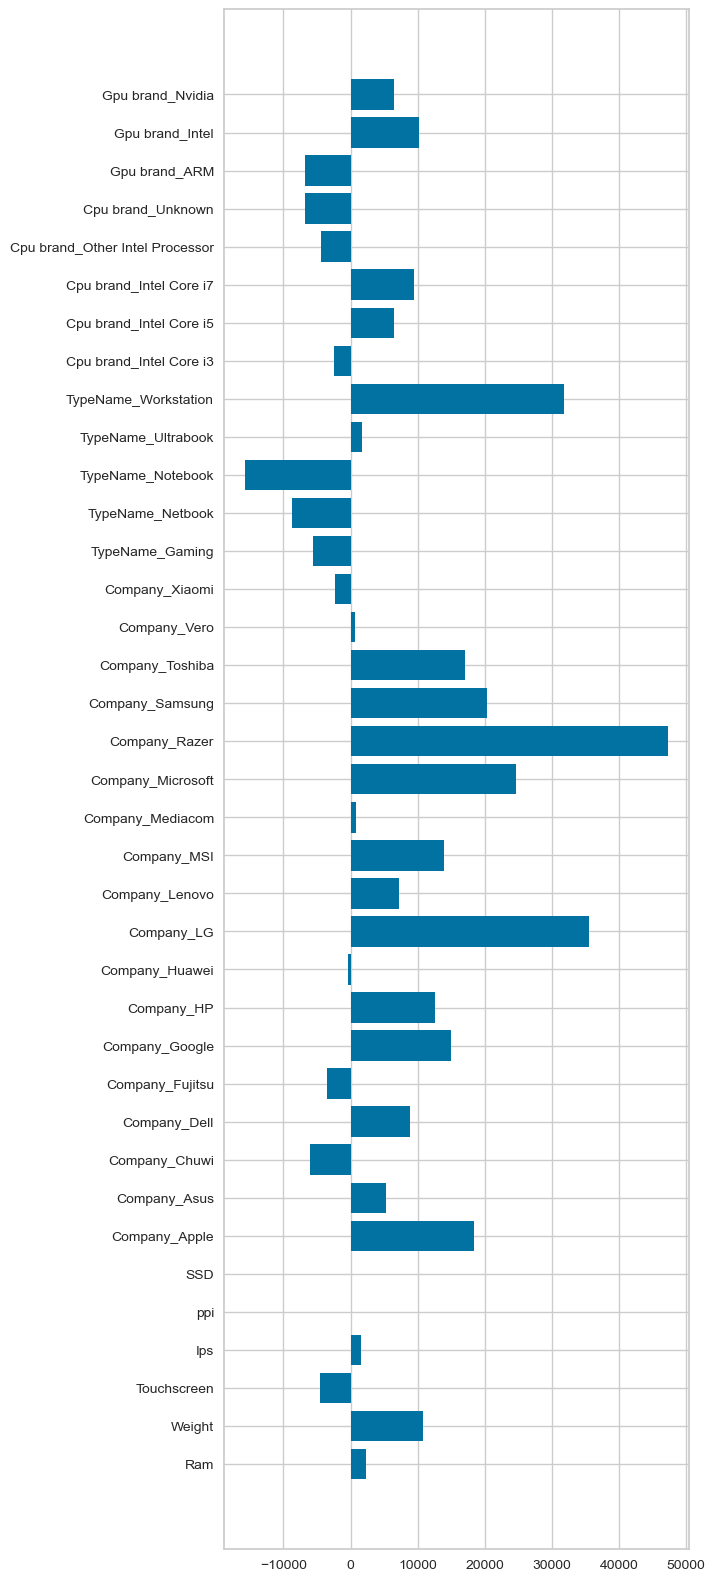

In [217]:
plt.figure(figsize=(6,20))
plt.barh(fi['Feature'],fi['Coefs']);

In [218]:
residuals=y_test-tahmin

# tahmin ettiğimiz değerleri gerçek değerlerden çıkaralım

In [219]:
residuals

Price
479   27906.305488
1022   3954.144834
298   -1743.300925
1265  -4840.454616
774    6512.759556
...            ...
1058 -13302.844382
199   -9008.101258
297   16271.775974
411   11518.633307
710    -901.801267

[261 rows x 1 columns]

In [220]:
#pip install yellowbrick

In [221]:
from yellowbrick.regressor import ResidualsPlot

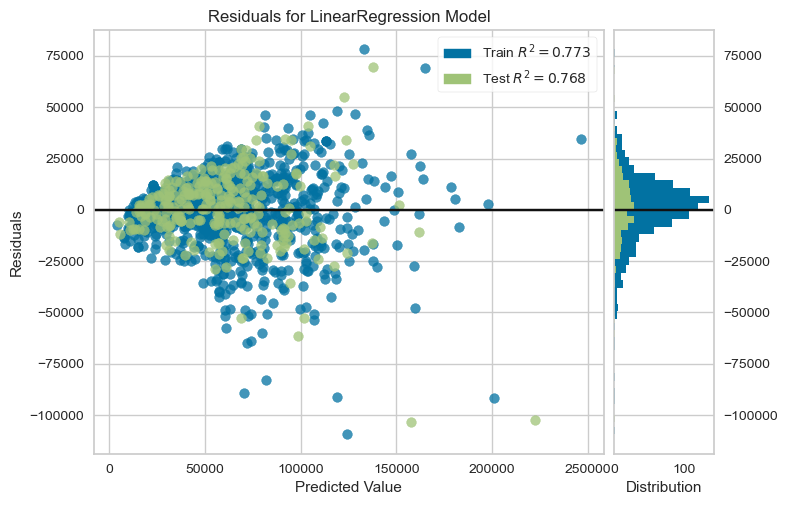

In [222]:
vis=ResidualsPlot(lr)
vis.fit(x_train,y_train)
vis.score(x_test,y_test)
vis.show()
plt.show()

In [223]:
# normalizing data

In [224]:
df.head()

Company   TypeName  Ram  Weight        Price  Touchscreen  Ips         ppi  \
0   Apple  Ultrabook    8    1.37   71378.6832            0    1  226.983005   
1   Apple  Ultrabook    8    1.34   47895.5232            0    0  127.677940   
2      HP   Notebook    8    1.86   30636.0000            0    0  141.211998   
3   Apple  Ultrabook   16    1.83  135195.3360            0    1  220.534624   
4   Apple  Ultrabook    8    1.37   96095.8080            0    1  226.983005   

       Cpu brand  HDD  SSD Gpu brand                  os  TotalStorage  \
0  Intel Core i5    0  128     Intel                 Mac           128   
1  Intel Core i5    0    0     Intel                 Mac             0   
2  Intel Core i5    0  256     Intel  Others/No OS/Linux           256   
3  Intel Core i7    0  512       AMD                 Mac           512   
4  Intel Core i5    0  256     Intel                 Mac           256   

   Touch_Ips  PerformanceIndex  
0          0       1815.864037  
1          0       1021.423521  
2          0       1129.695985  
3          0       3528.553982  
4          0       1815.864037

In [225]:
from sklearn.preprocessing import MinMaxScaler

In [226]:
x=MinMaxScaler().fit_transform(x)

In [227]:
x

array([[0.09677419, 0.16957607, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.09677419, 0.16209478, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.09677419, 0.29177059, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.20199502, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06451613, 0.37406487, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03225806, 0.37655863, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [228]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


In [229]:
lr.fit(x_train,y_train)

LinearRegression()

In [230]:
tahmin=lr.predict(x_test)

In [231]:
r2_score(y_test,tahmin)

0.7680474833993955

##### _linear olmayan modeller_

In [232]:
from sklearn.tree import DecisionTreeRegressor

In [233]:
dt=DecisionTreeRegressor()

In [234]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [235]:
tahmindt=dt.predict(x_test)

In [236]:
r2_score(y_test,tahmindt)


0.7293482151852713

In [237]:
mean_squared_error(y_test,tahmindt)**.5 

19754.685062140794

In [238]:
from sklearn.ensemble import ExtraTreesRegressor

In [239]:
ET=ExtraTreesRegressor()

In [240]:
ET.fit(x_train,y_train)

ExtraTreesRegressor()

In [241]:
tahminET=ET.predict(x_test)

In [242]:
r2_score(y_test,tahminET)

0.727446470750876

In [243]:
mean_squared_error(y_test,tahminET)**.5 

19823.96707219045

In [244]:
#pip install xgboost

In [245]:
from xgboost import XGBRegressor

In [246]:
xgb=XGBRegressor()

In [247]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [248]:
tahminXGB=xgb.predict(x_test)

In [249]:
r2_score(y_test,tahminXGB)

0.841930627822876

In [250]:
# bütün modelleri deneyen tek bir

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        x=MinMaxScaler().fit_transform(x)
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [252]:
algo_test(x,y)

R_Squared          RMSE           MAE
XGBRegressor          0.841931  15096.924720   9218.607422
Gradient Boosting     0.836930  15333.846701  10228.215372
Decision Tree         0.772277  18120.400817  11984.117807
Lasso                 0.768176  18282.859529  12666.224283
Linear                0.768047  18287.915529  12676.872014
Ridge                 0.757770  18688.664965  12756.784260
SGD                   0.743564  19228.888034  12987.209309
Extra Tree            0.683400  21365.831048  12728.677568
KNeighborsRegressor   0.671988  21747.503974  17869.241509
AdaBoost              0.647567  22542.536745  13298.224607
ElasticNet            0.343323  30770.919782  21230.245409
SVR                  -0.027776  38495.850185  26379.824506
mlp_regressor        -2.282606  68797.721304  57455.385249

_Model karşılaştırmaları sonucunda en yüksek başarı **XGBRegressor (R² = 0.8419)** ve **Gradient Boosting (R² = 0.8371)** modellerinde elde edilmiştir._